### **Objective Statement**

 To develop a predictive model that can accurately estimate health insurance charges for individuals 
 based on their demographic and health-related information

### *** Approach Defination***
 - Import Libraries
 - Import the Data
 - Clean the Data
 - Split the Data into Training/Test Sets
 - Create a Model
 - Train the Model
 - Make Predictions

### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### **Load Data**

In [3]:
# The Machine type is a Regression Model since it involves pricing/charges

ins_df = pd.read_csv('insurance.csv') 
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Profiling

In [4]:
ins_df.head()  # printing of first five rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ins_df.tail()  # printing of last five rows of the dataset

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
ins_df.shape  # printing number of records and columns

(1338, 7)

### List of columns

In [7]:
ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Columns Datatype

In [8]:
ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Data Information

In [9]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Using AI generate data dictionary

Age: This variable represents the age of the individuals in the dataset. It is likely to be a numerical variable indicating the age in years.

Sex: This variable indicates the gender of the individuals in the dataset. It is a categorical variable with two possible values, most likely 'male' and 'female'.

Body Mass Index(BMI): This variable represents the Body Mass Index (BMI) of the individuals. It is a numerical variable that quantifies an individual's body fat based on their weight and height.

Children: This variable indicates the number of children or dependents the individuals have. It is a numerical variable representing a count.

Smoker: This variable indicates whether the individual is a smoker or not. It is a categorical variable with two possible values, such as 'yes' and 'no'.

Region: This variable represents the geographic region where the individuals are located or insured. It is a categorical variable that could have multiple values based on different regions.

Charges: This variable represents the medical charges or insurance premiums for the individuals. It is a numerical variable indicating the cost associated with healthcare coverage or services.

### Data Cleaning

In [10]:
ins_df.duplicated().sum() # checking for duplicates

1

In [11]:
ins_df[ins_df.duplicated()] # It appears there is 1 deuplicate in the dataset

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
ins_df1 = ins_df.drop_duplicates()

In [13]:
ins_df1.shape

(1337, 7)

In [14]:
ins_df1.isnull().sum() # Checking for missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset is fine there is no missing values

###  List of Categorical and Numerical Columns

In [15]:
num_columns = ins_df1.select_dtypes(include='number').columns.to_list()
cat_columns = ins_df1.select_dtypes(exclude='number').columns.to_list()
print(f'num columns in the data:{num_columns}')
print(f'cat columns in the data:{cat_columns}')

num columns in the data:['age', 'bmi', 'children', 'charges']
cat columns in the data:['sex', 'smoker', 'region']


### Statistical Measure of Numeric Columns

In [16]:
ins_df1.describe() # this stat. defines the numercial columns

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
ins_df1.describe(exclude ='number') # This stat defines the categorical columns

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


### Data Visualization

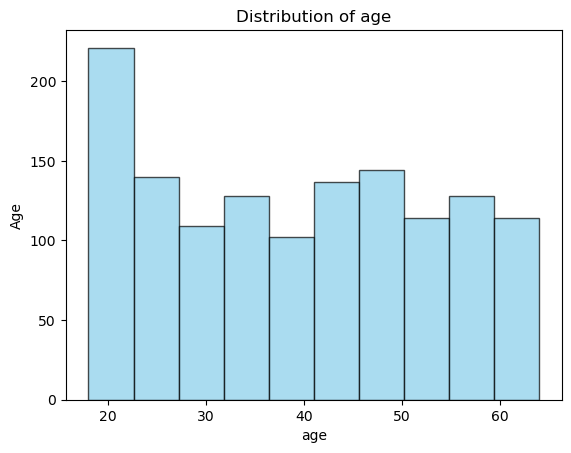

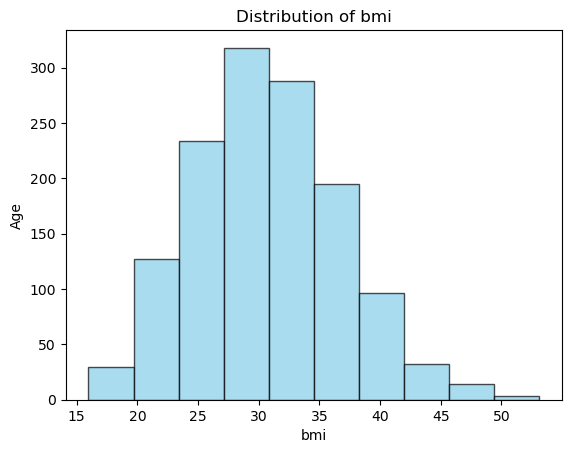

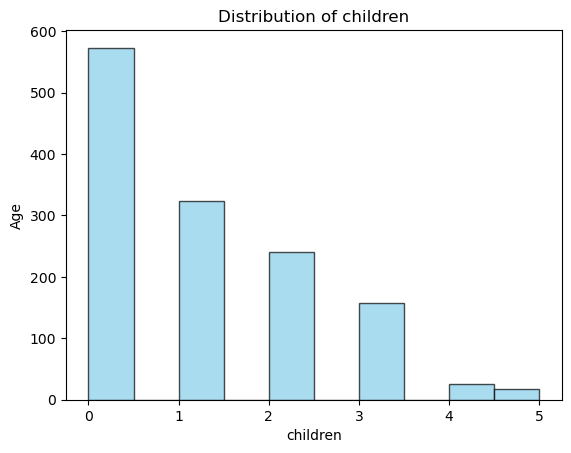

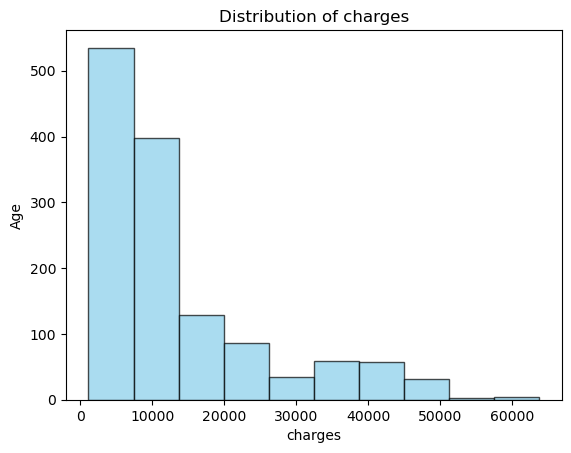

In [18]:
# Histogram of Numeric Columns
for column in num_columns:    
    plt.hist(ins_df1[column], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Age')
    plt.show()

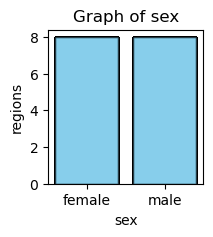

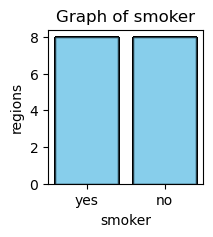

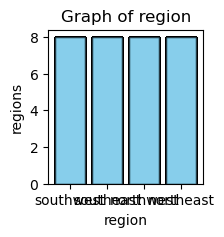

In [19]:
# Using a Bar Chart for Categorical Columns
for column in cat_columns:
    plt.figure(figsize=(2,2))
    plt.bar(ins_df1[column], color='skyblue', edgecolor='black', height = 8, alpha=0.2)
    plt.title(f'Graph of {column}')
    plt.xlabel(column)
    plt.ylabel('regions')
    plt.show()

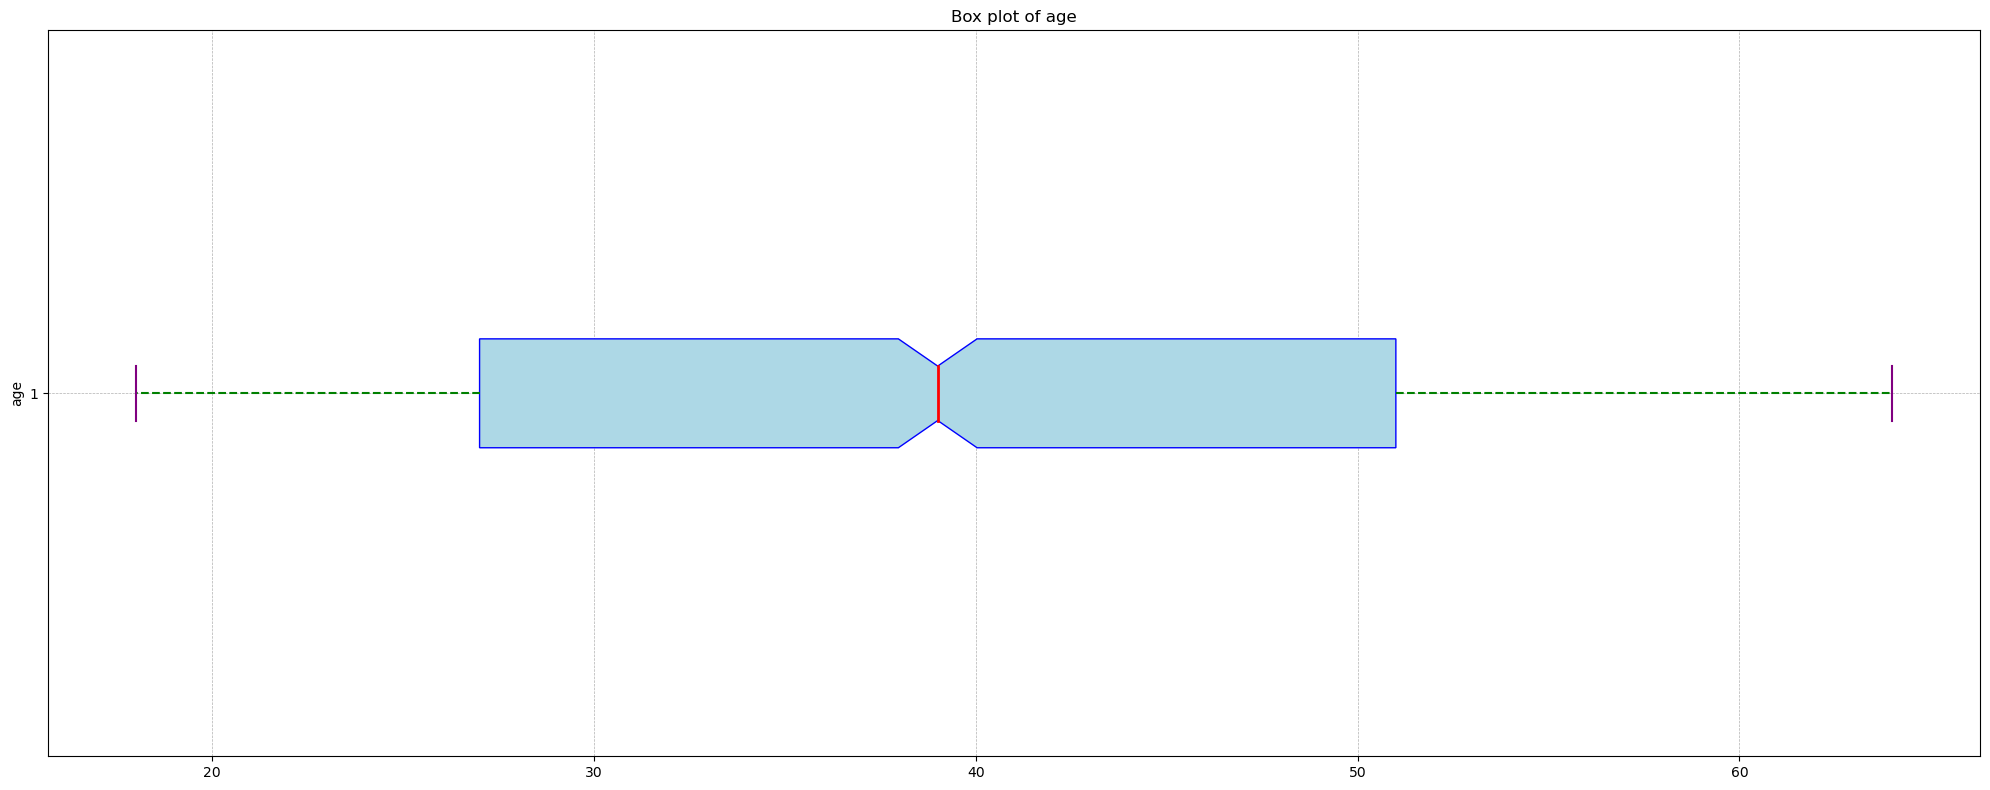

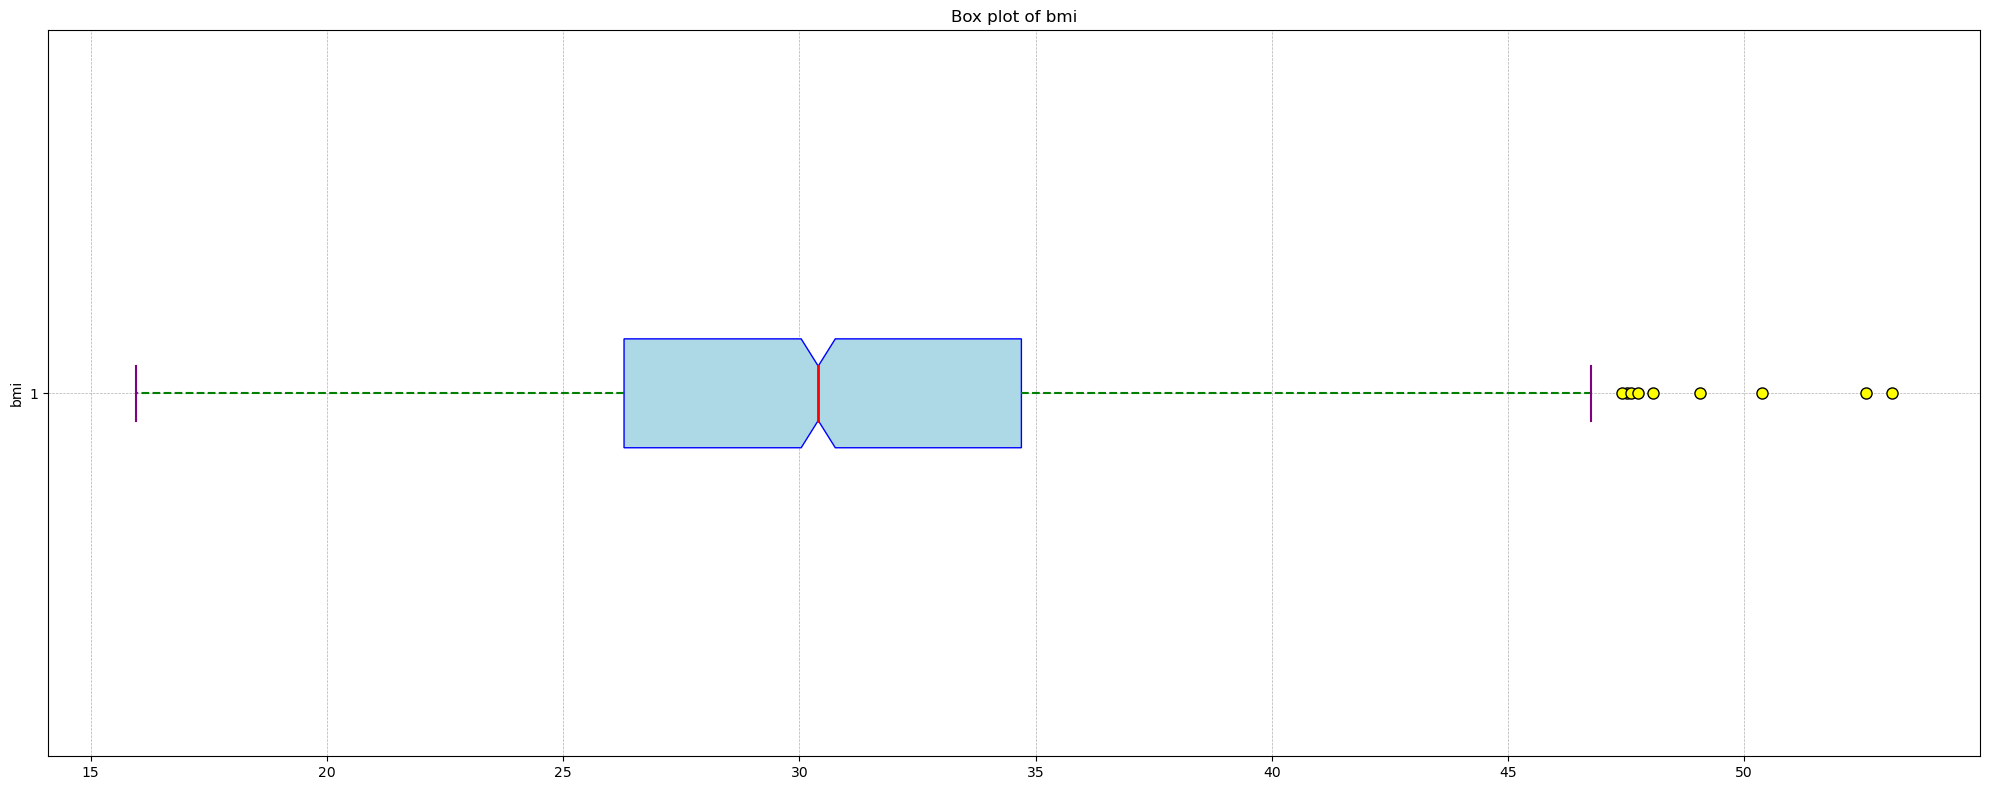

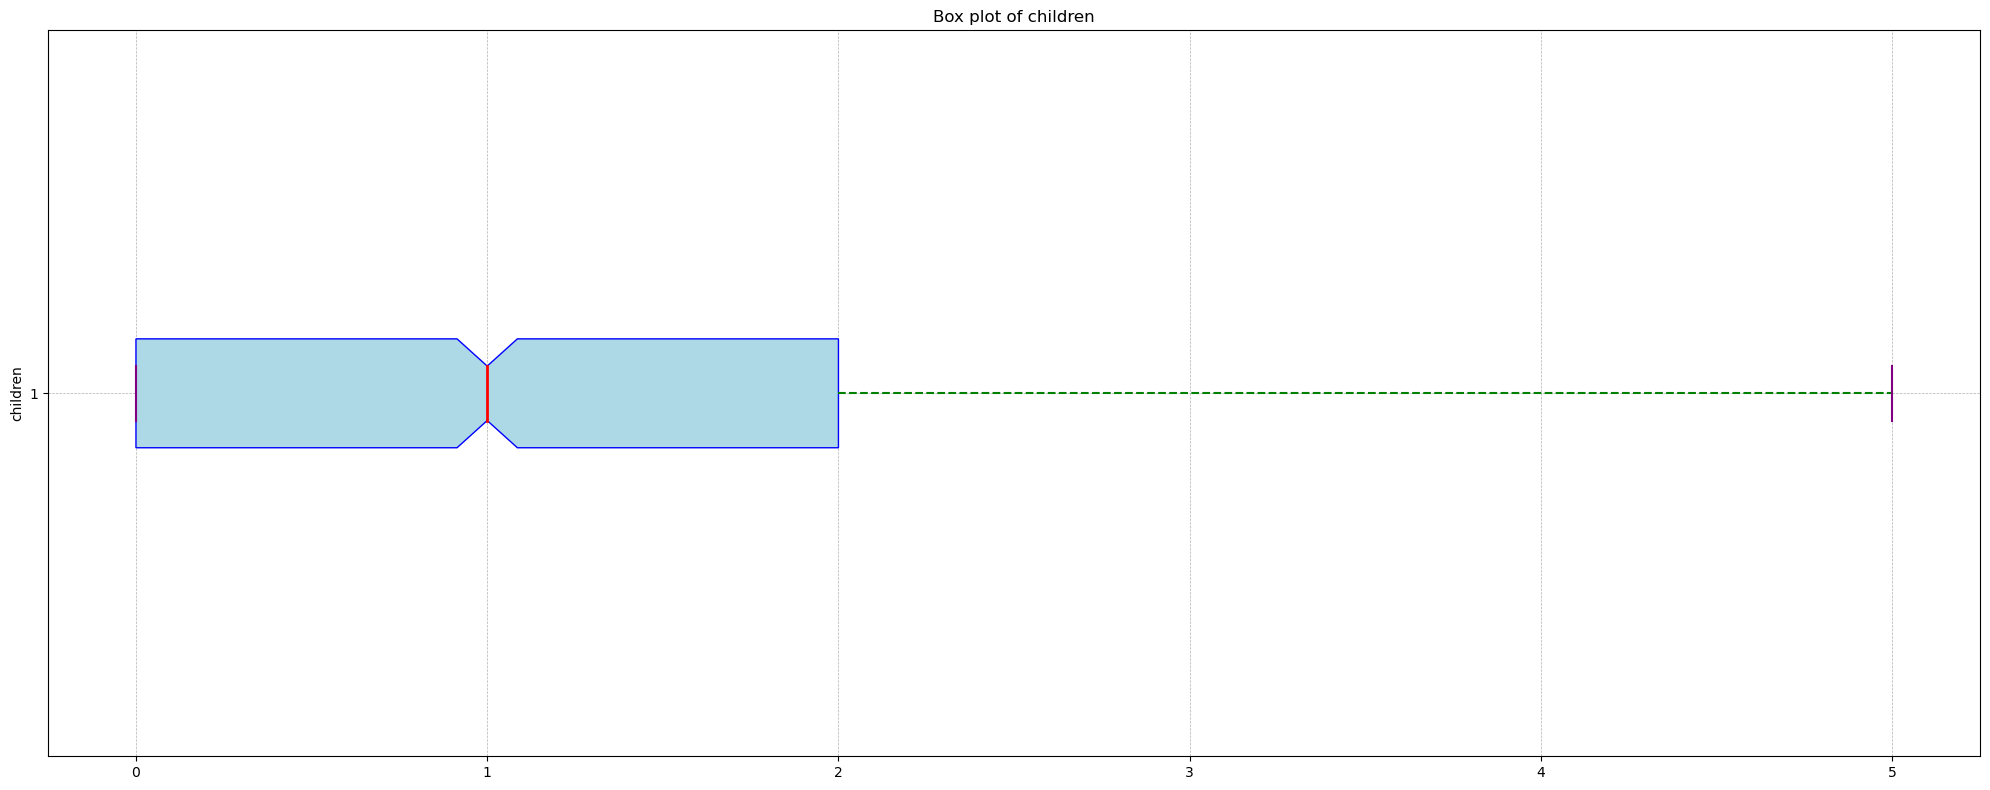

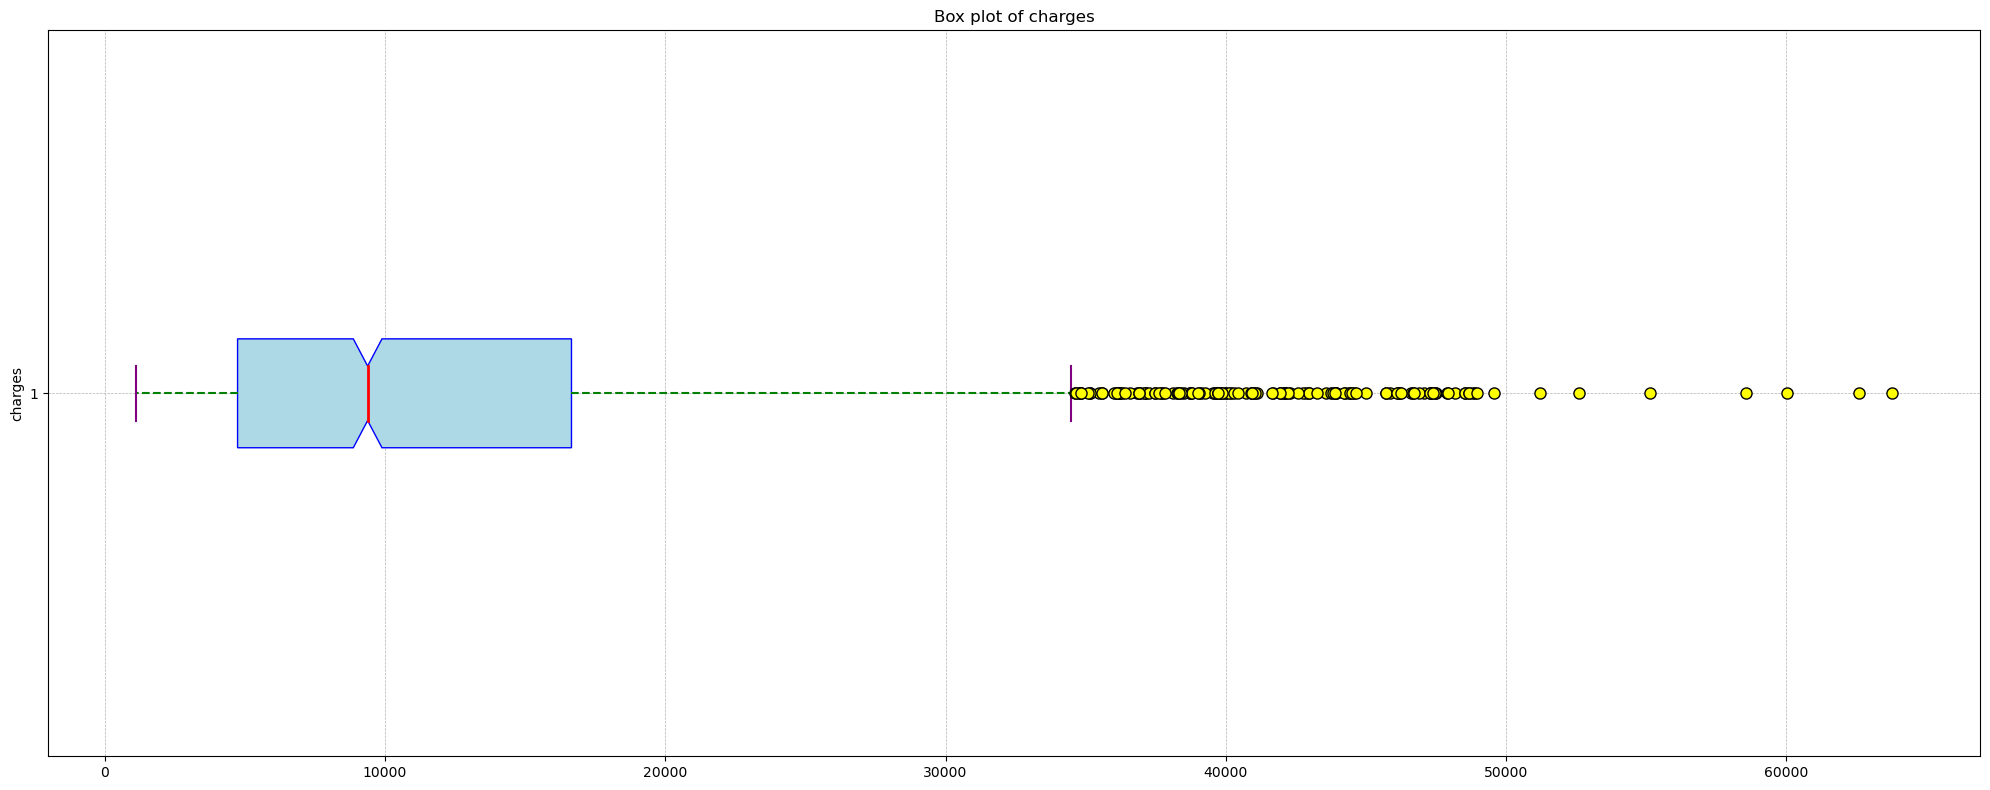

In [20]:
# Boxplot for numeric columns
for column in num_columns:
    plt.figure(figsize=(20,8))
    plt.boxplot(ins_df1[column], notch=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red', linewidth=2), whiskerprops=dict(color='green', linewidth=1.5, linestyle='--'), capprops=dict(color='purple', linewidth=1.5), flierprops=dict(marker='o', markersize=8, markerfacecolor='yellow', markeredgecolor='black'), vert=False)
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout() 
    plt.show()

In [21]:
# Using a pie chart to determine regions
region_count = ins_df1['region'].value_counts()

In [22]:
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

#### Correlation Matrix

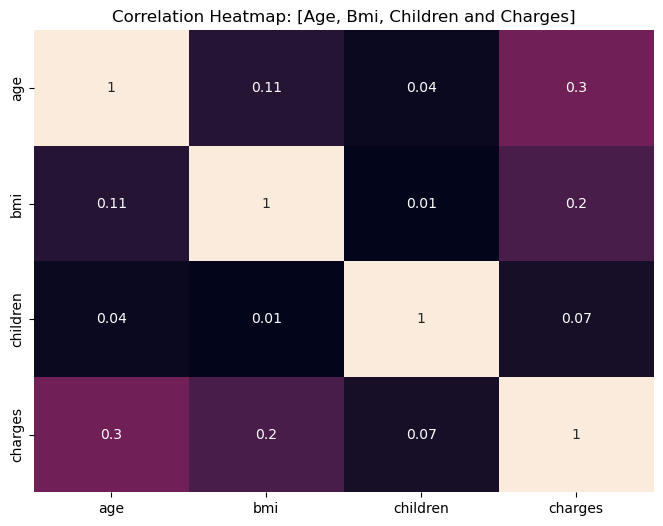

In [23]:
correlation_data = ins_df1[['age', 'bmi', 'children', 'charges']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(round(correlation_data,2), annot = True, cbar=False)
plt.title('Correlation Heatmap: [Age, Bmi, Children and Charges]')
plt.show()

#### The Heatmap presented above represent numericial data from the independent variable. The correlation  matrix with different colors helps to quickly identify strong positive correlation between variables. The black color which close to -1 indicate a strong negative correlation between the variable.  

#### Scatter Plot

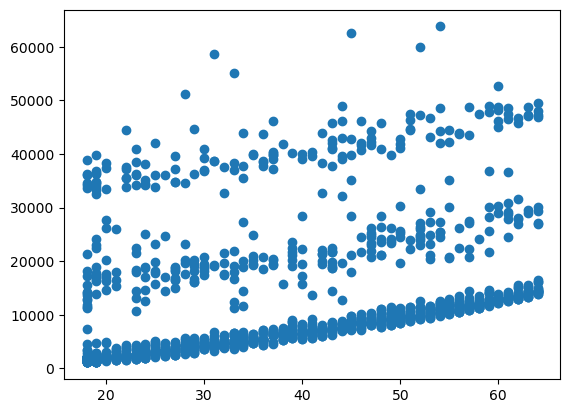

In [24]:
plt.scatter(data=ins_df1, x='age', y='charges')

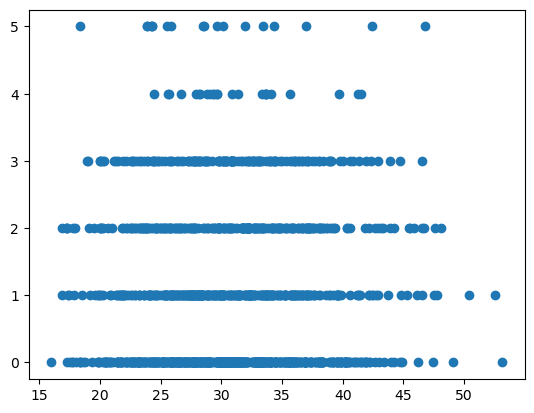

In [25]:
plt.scatter(data=ins_df1, x='bmi', y='children')

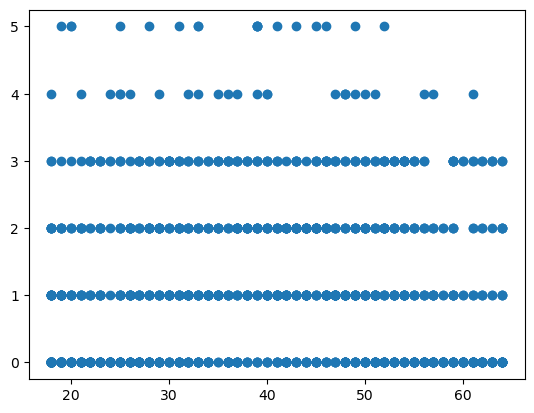

In [26]:
plt.scatter(data=ins_df1, x='age', y='children')

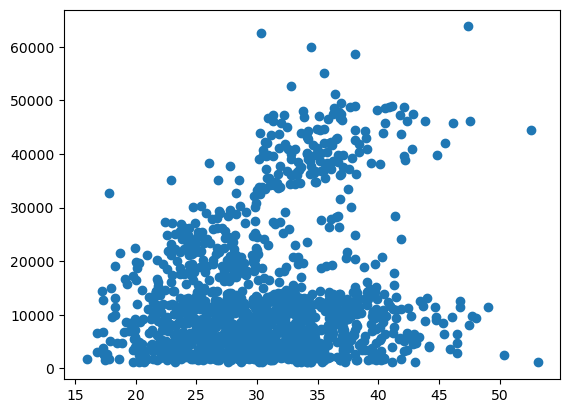

In [27]:
plt.scatter(data=ins_df1, x='bmi', y='charges')

### Insurance Cost for Smoker and Non-Smoker

In [28]:
smoker_df = ins_df1.groupby('smoker')['charges'].mean().reset_index
smoker_df

<bound method Series.reset_index of smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64>

In [29]:
gender_df = ins_df1.groupby('sex')['charges'].mean().reset_index
gender_df

<bound method Series.reset_index of sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64>

In [30]:
age_df = ins_df1.groupby('age')['charges'].mean().reset_index
age_df

<bound method Series.reset_index of age
18     7086.217556
19     9868.929428
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64>

### Machine Learning

In [31]:
from sklearn.preprocessing import LabelEncoder # label encoding
le = LabelEncoder()

In [32]:
ins_df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
ins_df1['sex']= le.fit_transform(ins_df1['sex'])
ins_df1['smoker']= le.fit_transform(ins_df1['smoker'])
ins_df1['region']= le.fit_transform(ins_df1['region'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12272\577310827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins_df1['sex']= le.fit_transform(ins_df1['sex'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12272\577310827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins_df1['smoker']= le.fit_transform(ins_df1['smoker'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12272\577310827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [34]:
# X- Independent Variable
# Y - Dependent Variable

X = ins_df1.drop(columns=['charges'], axis =1)
Y = ins_df1['charges']

In [38]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [39]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

### Spliting the Dataset into Training and Testing

In [40]:
from sklearn.model_selection import train_test_split # Split the data into train and test

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True)
print(f'the shape of X train:{X_train.shape}')
print(f'the shape of Y train:{Y_train.shape}')
      
print('*'*30)

print(f'the shape of X test:{X_test.shape}')
print(f'the shape of Y test:{Y_test.shape}')

the shape of X train:(1069, 6)
the shape of Y train:(1069,)
******************************
the shape of X test:(268, 6)
the shape of Y test:(268,)


In [42]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


### Scalling Features

In [43]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [44]:
X['age'] = std_scaler.fit_transform(np.array(X['age']).reshape(-1, 1))
X['bmi'] = std_scaler.fit_transform(np.array(X['bmi']).reshape(-1, 1))
X['children'] = std_scaler.fit_transform(np.array(X['children']).reshape(-1, 1))

In [45]:
X

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


### Developing a Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()

In [47]:
linear_regression_model.fit(X_train, Y_train)

LinearRegression()

### Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score, cross_validate

In [49]:
result = cross_validate(linear_regression_model, X, Y, cv =5, return_train_score =True, scoring = 'r2')
result

{'fit_time': array([0.00868559, 0.02491713, 0.01711035, 0.01563358, 0.01492858]),
 'score_time': array([0.01572371, 0.01305246, 0.0009973 , 0.        , 0.        ]),
 'test_score': array([0.76123487, 0.70840689, 0.77720769, 0.73365562, 0.7551376 ]),
 'train_score': array([0.74737531, 0.75930033, 0.74326474, 0.75468466, 0.74915469])}

In [50]:
# The test and train score return 0.75 which is equivalent to 75% shows that the model is fairly fit for the analysis

In [51]:
train_acc = result['train_score'].mean()*100
print ('Training Accuracy =', round(train_acc,2), '%')

Training Accuracy = 75.08 %


In [52]:
test_acc = result['train_score'].mean()*100
print ('Testing Accuracy =', round(test_acc,2), '%')

Testing Accuracy = 75.08 %


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
models=[]
models.append(('Linear Regression', LinearRegression()))
models.append(('knn', KNeighborsRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Random Forest', RandomForestRegressor()))

for model in models:
    result = cross_validate(linear_regression_model, X, Y, cv = 5, return_train_score =True, scoring = 'r2')
    print(model)
    train_acc = round((result['train_score'].mean()) * 100, 2) # rounding up to 2 decimal places
    test_acc = round((result['train_score'].mean()) * 100, 2)
    print(f'Train R2 score : {train_acc}')
    print(f'Test R2 score : {test_acc}')
    print('\n')

('Linear Regression', LinearRegression())
Train R2 score : 75.08
Test R2 score : 75.08


('knn', KNeighborsRegressor())
Train R2 score : 75.08
Test R2 score : 75.08


('Decision Tree', DecisionTreeRegressor())
Train R2 score : 75.08
Test R2 score : 75.08


('Random Forest', RandomForestRegressor())
Train R2 score : 75.08
Test R2 score : 75.08




In [ ]:
# it is strange that the four algorithm returned the same value of 75.08